In [1]:
!pip install pulser

  Obtaining dependency information for pulser from https://files.pythonhosted.org/packages/ed/72/f48573ae6651aa9861fca3933250ebdeed48711cb2be3bf62b65eae2abee/pulser-0.15.2-py3-none-any.whl.metadata
  Obtaining dependency information for pulser-core==0.15.2 from https://files.pythonhosted.org/packages/08/c5/82cc26ef30992a879081113d8f990bf9ef680668a8ba65b26dc7476c7314/pulser_core-0.15.2-py3-none-any.whl.metadata
  Obtaining dependency information for pulser-simulation==0.15.2 from https://files.pythonhosted.org/packages/11/3f/3c7747d2f8fe3006b8bcce3ca60ef49764e473bdb312f4a2f3037d4bd983/pulser_simulation-0.15.2-py3-none-any.whl.metadata
  Obtaining dependency information for pulser-pasqal==0.15.2 from https://files.pythonhosted.org/packages/da/cb/8f43848afaf7ce19e290da32c9296fbf5455baf6c2851103ffed16349a13/pulser_pasqal-0.15.2-py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema>=4.18 from https://files.pythonhosted.org/packages/0f/bf/a84bc75f069f4f156e1c0d9892fb732

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pulser import Pulse, Sequence, Register
from pulser_simulation import QutipEmulator
from pulser.devices import Chadoq2
from pulser.waveforms import InterpolatedWaveform
from scipy.optimize import minimize
from scipy.spatial.distance import pdist, squareform

Simple Example with Toy Slots

In [114]:
qubits = {'A1':(0,0), 'A2':(0,10), 'A3':(-10,5), 'B1':(10,10), 'B2':(10, 0), 'C1':(5,-5)} #Possible slots for our trains

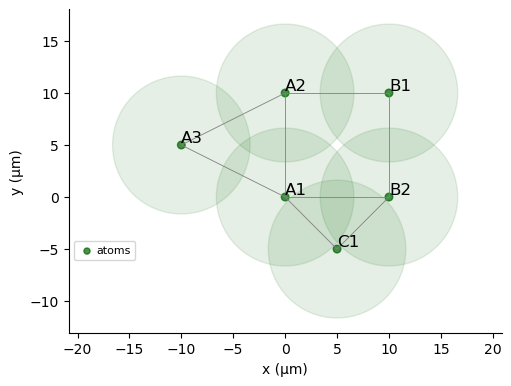

In [5]:
reg = Register(qubits)
reg.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1),
    draw_graph=True,
    draw_half_radius=True,
)

In [6]:
# We choose a median value between the min and the max
Omega = np.pi
delta_0 = -5  # just has to be negative
delta_f = -delta_0  # just has to be positive
T = 4000  # time in ns, we choose a time long enough to ensure the propagation of information in the system

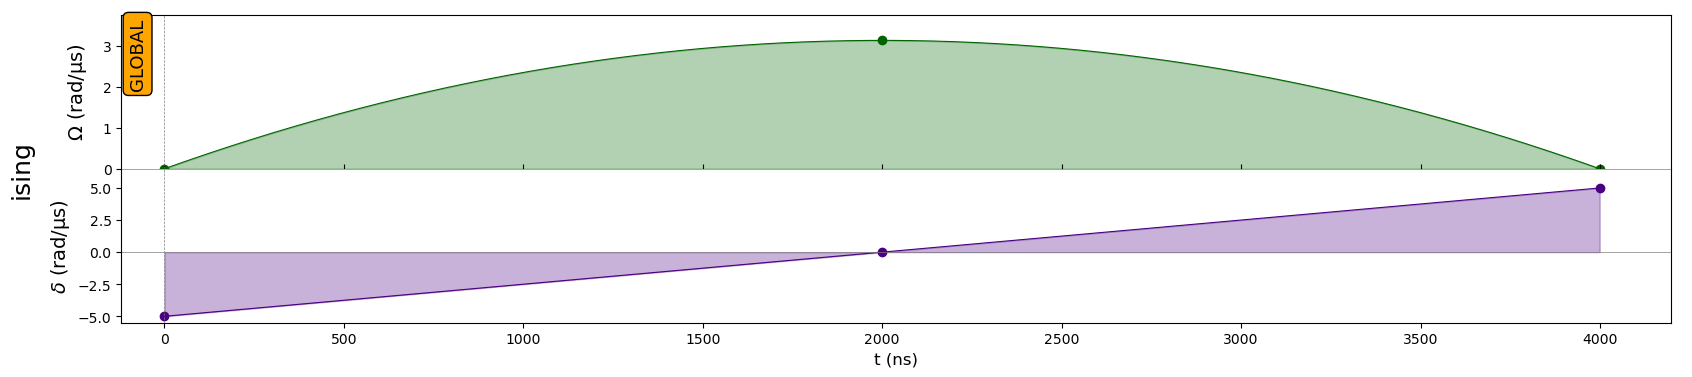

In [7]:
adiabatic_pulse = Pulse(
    InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
    InterpolatedWaveform(T, [delta_0, 0, delta_f]),
    0,
)
seq = Sequence(reg, Chadoq2)
seq.declare_channel("ising", "rydberg_global")
seq.add(adiabatic_pulse, "ising")
seq.draw()

In [8]:
simul = QutipEmulator.from_sequence(seq)
results = simul.run()
final = results.get_final_state()
count_dict = results.sample_final_state()

In [9]:
def plot_distribution(C):
    C = dict(sorted(C.items(), key=lambda item: item[1], reverse=True))
    indexes = ["001101"]  #Expected Solution
    color_dict = {key: "r" if key in indexes else "g" for key in C}
    plt.figure(figsize=(12, 6))
    plt.xlabel("bitstrings")
    plt.ylabel("counts")
    plt.bar(C.keys(), C.values(), width=0.5, color=color_dict.values())
    plt.xticks(rotation="vertical")
    plt.show()

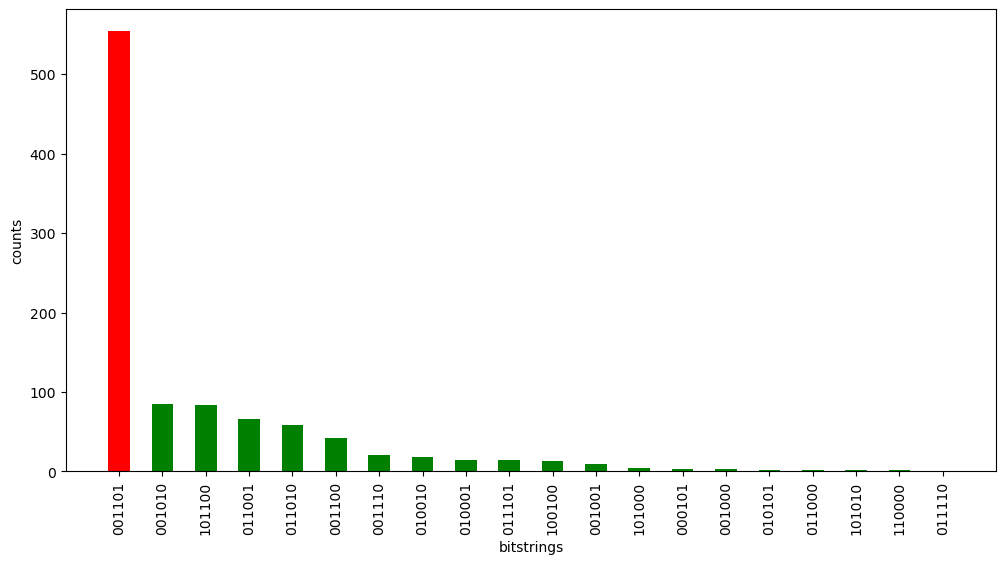

In [10]:
plot_distribution(count_dict)

Train Station Example

In [37]:
qubits = {'q1':(0,0), 'q2':(10,0), 'q3':(10,10), 'q4':(20,10), 'q5':(30,10)} #Slots for the arrival of the trains to the train station

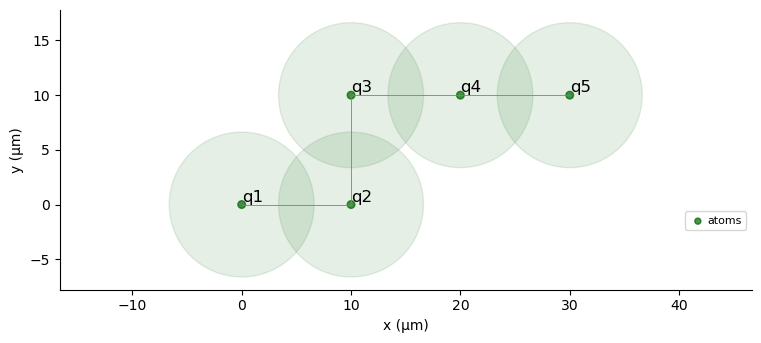

In [38]:
reg = Register(qubits)
reg.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1),
    draw_graph=True,
    draw_half_radius=True,
)

In [39]:
# We choose a median value between the min and the max
Omega = np.pi
delta_0 = -5  # just has to be negative
delta_f = -delta_0  # just has to be positive
T = 4000  # time in ns, we choose a time long enough to ensure the propagation of information in the system

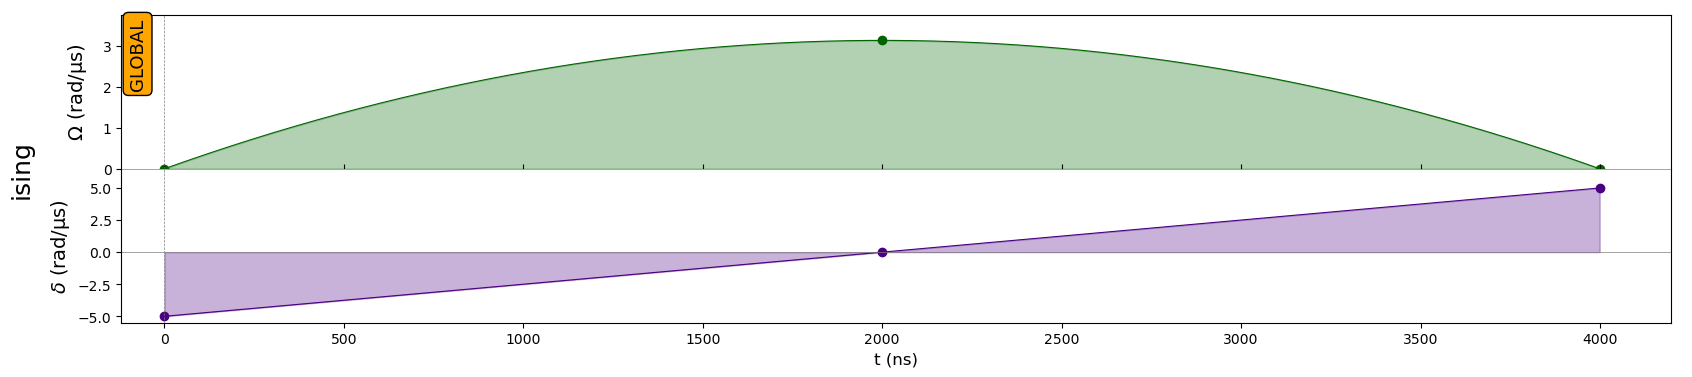

In [40]:
adiabatic_pulse = Pulse(
    InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
    InterpolatedWaveform(T, [delta_0, 0, delta_f]),
    0,
)
seq = Sequence(reg, Chadoq2)
seq.declare_channel("ising", "rydberg_global")
seq.add(adiabatic_pulse, "ising")
seq.draw()

In [41]:
simul = QutipEmulator.from_sequence(seq)
results = simul.run()
final = results.get_final_state()
count_dict = results.sample_final_state()

In [42]:
def plot_distribution(C):
    C = dict(sorted(C.items(), key=lambda item: item[1], reverse=True))
    indexes = ["10101"]  #Expected Solution
    color_dict = {key: "r" if key in indexes else "g" for key in C}
    plt.figure(figsize=(12, 6))
    plt.xlabel("bitstrings")
    plt.ylabel("counts")
    plt.bar(C.keys(), C.values(), width=0.5, color=color_dict.values())
    plt.xticks(rotation="vertical")
    plt.show()

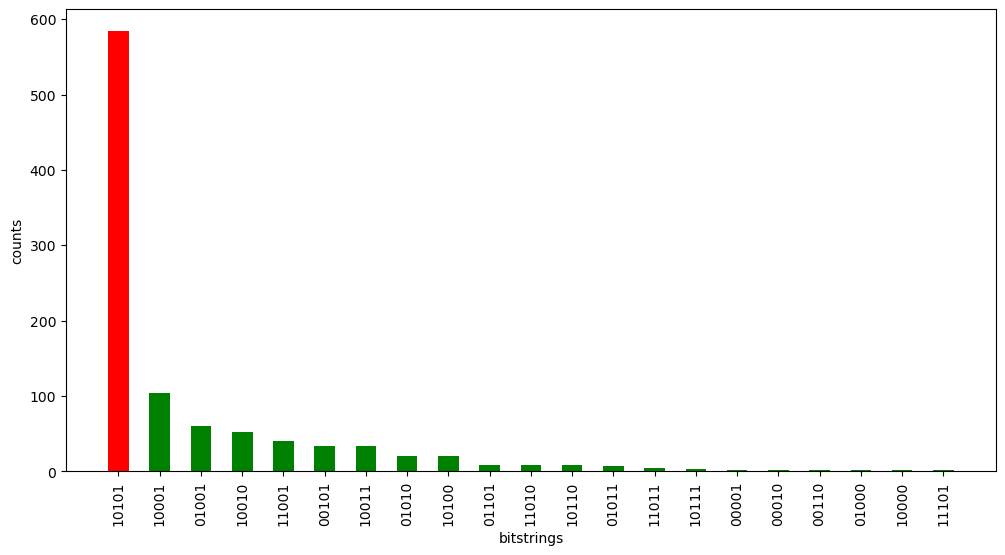

In [43]:
plot_distribution(count_dict)

In [51]:
qubits = {'q1':(0,0), 'q2':(10,0), 'q3':(10,10), 'q4':(20,10), 'q5':(30,10), 'q6':(10, -10)} #Slots including a delay in one of the trains

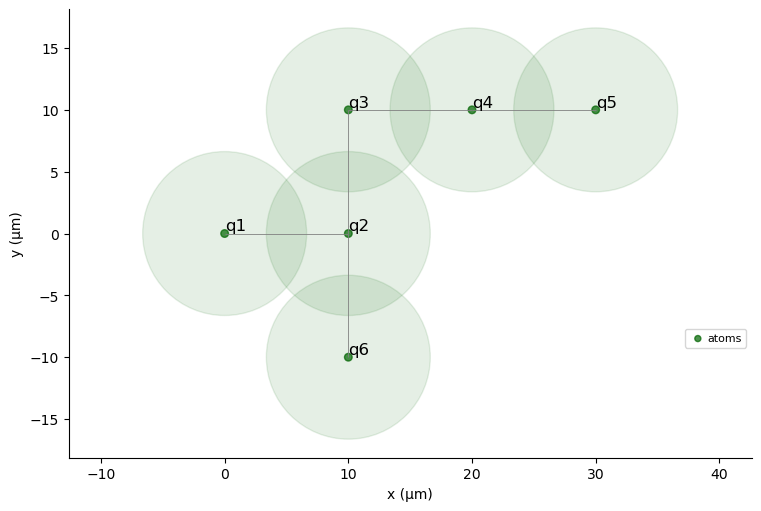

In [52]:
reg = Register(qubits)
reg.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1),
    draw_graph=True,
    draw_half_radius=True,
)

In [53]:
# We choose a median value between the min and the max
Omega = np.pi
delta_0 = -5  # just has to be negative
delta_f = -delta_0  # just has to be positive
T = 4000  # time in ns, we choose a time long enough to ensure the propagation of information in the system

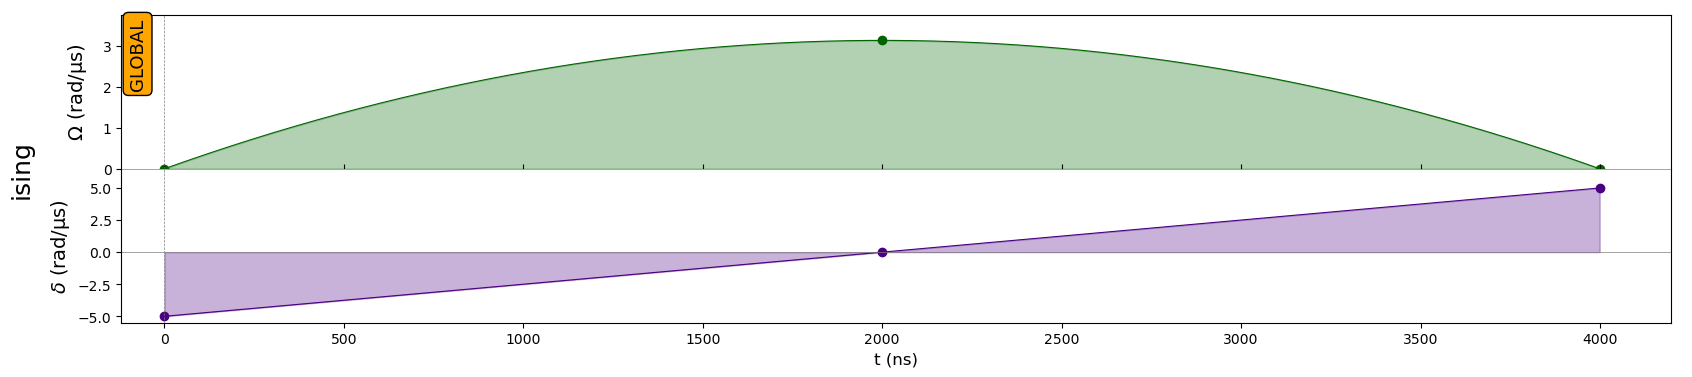

In [54]:
adiabatic_pulse = Pulse(
    InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
    InterpolatedWaveform(T, [delta_0, 0, delta_f]),
    0,
)
seq = Sequence(reg, Chadoq2)
seq.declare_channel("ising", "rydberg_global")
seq.add(adiabatic_pulse, "ising")
seq.draw()

In [55]:
simul = QutipEmulator.from_sequence(seq)
results = simul.run()
final = results.get_final_state()
count_dict = results.sample_final_state()

In [56]:
def plot_distribution(C):
    C = dict(sorted(C.items(), key=lambda item: item[1], reverse=True))
    indexes = ["101011"]  #Expected Solution
    color_dict = {key: "r" if key in indexes else "g" for key in C}
    plt.figure(figsize=(12, 6))
    plt.xlabel("bitstrings")
    plt.ylabel("counts")
    plt.bar(C.keys(), C.values(), width=0.5, color=color_dict.values())
    plt.xticks(rotation="vertical")
    plt.show()

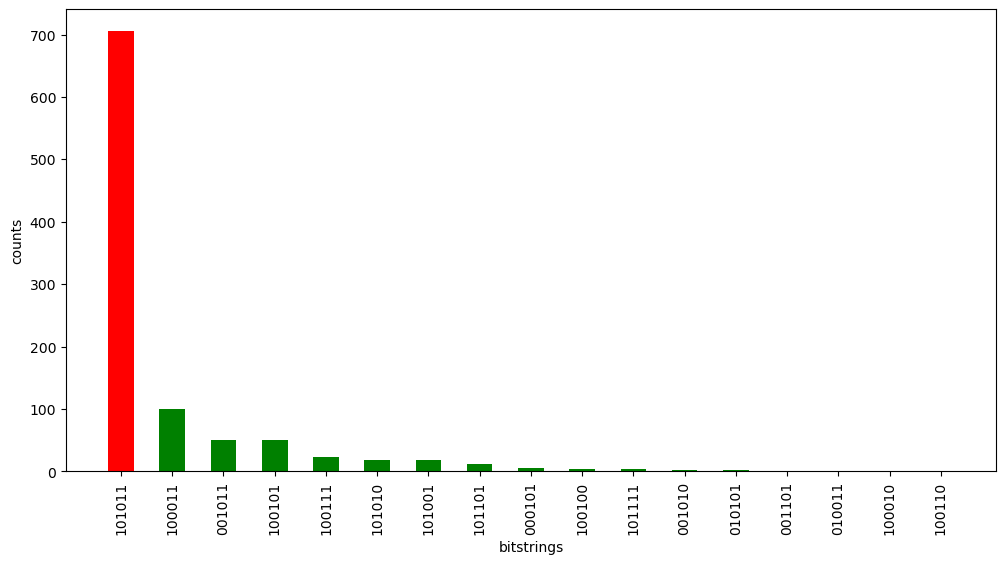

In [57]:
plot_distribution(count_dict)

Hour calculation for the Energy Excell

In [115]:
N_qubits = 140

max_degree3 = 1.0836**N_qubits*0.001/3600
max_degree6 = 1.1893**N_qubits*0.001/3600
max_degree7 = 1.1970**N_qubits*0.001/3600
max_degree = 1.1996**N_qubits*0.001/3600
print('Max Degree 3 BasicGPU Time (h): ',max_degree3)
print('Max Degree 6 BasicGPU Time (h): ',max_degree6)
print('Max Degree 7 BasicGPU Time (h): ',max_degree7)
print('Max Degree BasicGPU Time (h): ',max_degree)

print('Max Degree 3 JoliotCurie Time (h): ',max_degree3*0.001)
print('Max Degree 6 JoliotCurie Time (h): ',max_degree6*0.001)
print('Max Degree 7 JoliotCurie Time (h): ',max_degree7*0.001)
print('Max Degree JoliotCurie Time (h): ',max_degree*0.001)

Max Degree 3 BasicGPU Time (h):  0.02115227040718161
Max Degree 6 BasicGPU Time (h):  9649.307419162134
Max Degree 7 BasicGPU Time (h):  23816.53382959828
Max Degree BasicGPU Time (h):  32270.187699260005
Max Degree 3 JoliotCurie Time (h):  2.1152270407181608e-05
Max Degree 6 JoliotCurie Time (h):  9.649307419162135
Max Degree 7 JoliotCurie Time (h):  23.81653382959828
Max Degree JoliotCurie Time (h):  32.270187699260006


In [116]:
N_qubits = 1000

max_degree3 = 1.0836**N_qubits*0.001/3600
max_degree6 = 1.1893**N_qubits*0.001/3600
max_degree7 = 1.1970**N_qubits*0.001/3600
max_degree = 1.1996**N_qubits*0.001/3600
print('Max Degree 3 BasicGPU Time (h): ',max_degree3)
print('Max Degree 6 BasicGPU Time (h): ',max_degree6)
print('Max Degree 7 BasicGPU Time (h): ',max_degree7)
print('Max Degree BasicGPU Time (h): ',max_degree)

print('Max Degree 3 JoliotCurie Time (h): ',max_degree3*0.001)
print('Max Degree 6 JoliotCurie Time (h): ',max_degree6*0.001)
print('Max Degree 7 JoliotCurie Time (h): ',max_degree7*0.001)
print('Max Degree JoliotCurie Time (h): ',max_degree*0.001)

Max Degree 3 BasicGPU Time (h):  2.054441883540911e+28
Max Degree 6 BasicGPU Time (h):  5.433959315995422e+68
Max Degree 7 BasicGPU Time (h):  3.4502288764146897e+71
Max Degree BasicGPU Time (h):  3.0210268607814493e+72
Max Degree 3 JoliotCurie Time (h):  2.054441883540911e+25
Max Degree 6 JoliotCurie Time (h):  5.433959315995422e+65
Max Degree 7 JoliotCurie Time (h):  3.4502288764146896e+68
Max Degree JoliotCurie Time (h):  3.0210268607814493e+69
